In [148]:
import pandas as pd
import seaborn as sns
import pylab
from glob import glob
import os

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 8),
         'axes.labelsize': 'x-large',
          'axes.labelweight': 'bold',
         'axes.titlesize':'x-large',
          'axes.titleweight': 'bold',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [405]:
def hist_equal_bins(s, bins, ticks=None, to_plot=True, **kwargs):
    s = s[~s.isnull()]
    hs, _ = np.histogram(s, bins=bins, **kwargs)
    if ticks is None:
        ticks = ['{}-{}'.format(a, b) if b > a + 1 else '{}'.format(a) for a, b in zip(bins[:-1], bins[1:])]
    s = pd.Series(hs, index=ticks)
    if to_plot:
        s.plot('bar', rot=30)
    else:
        return s

In [4]:
df = pd.read_csv('/Users/roee/Downloads/wtp survey v3-500 - All responses.csv')

In [6]:
df.head(3)

,User ID,Time (UTC),Survey Completion,Publisher Category,Gender,Age,Geography,Weight,Question #1 Answer,Question #2 Answer,...,Question #7 Answer,Question #8 Answer,Response Time #1 (ms),Response Time #2 (ms),Response Time #3 (ms),Response Time #4 (ms),Response Time #5 (ms),Response Time #6 (ms),Response Time #7 (ms),Response Time #8 (ms)
0,1000643665,2017-08-07 23:09:28,Partial,News,Male,18-24,US-MIDWEST-IL-Peoria,NaN,"Yes, someone I know have",Limited value,...,NaN,NaN,10747,8665.0,6131.0,13605.0,3336.0,NaN,NaN,NaN
1,1007130890,2017-08-07 22:56:55,Complete,News,Male,18-24,US-WEST-UT-Smithfield,NaN,"Yes, I have",Not valuable,...,Graduate degree,Yes,5115,3620.0,3259.0,4224.0,1287.0,2732.0,4347.0,2059.0
2,1009632570,2017-08-07 08:40:57,Complete,Arts & Entertainment,Male,35-44,US-SOUTH-SC-Southern Shops,NaN,"No, not that I know of",Very valuable for others,...,Undergraduate degree,No,8059,1970.0,3228.0,9823.0,2664.0,4687.0,3236.0,3880.0


In [8]:
df.shape

(1082, 24)

##### questions

In [7]:
print '''
Question number	Question text
1	Have you, a friend, or family member, had to pay a large hospital bill out of pocket?
2	Consider a product that, for a small monthly fee, covers the HIGH out-of-pocket cost of hospitalization due to deterioration of chronic condition? How valuable is that?
3	How likely is a chronic patient to buy this protection?
4	How much per month would a chronic patient be willing to pay for this protection?
5	How likely are YOU to buy this protection?
6	How much per month would YOU be willing to pay for this protection?
7	What is the highest level of education you have completed?
8	Are you a primary caregiver?'''


Question number	Question text
1	Have you, a friend, or family member, had to pay a large hospital bill out of pocket?
2	Consider a product that, for a small monthly fee, covers the HIGH out-of-pocket cost of hospitalization due to deterioration of chronic condition? How valuable is that?
3	How likely is a chronic patient to buy this protection?
4	How much per month would a chronic patient be willing to pay for this protection?
5	How likely are YOU to buy this protection?
6	How much per month would YOU be willing to pay for this protection?
7	What is the highest level of education you have completed?
8	Are you a primary caregiver?


# Rounding and bucketing of wtp values

In [88]:
q4 = df['Question #4 Raw Response']
q4 = q4.replace('no idea', -1).astype('float').replace(-1, nan)
q4.value_counts().sort_index()

0.0        174
1.0          6
2.0          3
3.0          1
4.0          2
5.0         19
7.0          1
8.0          2
10.0        24
15.0         4
20.0        32
25.0        32
29.0         1
30.0         8
35.0         2
40.0         4
45.0         2
50.0        49
55.0         1
60.0         3
75.0         4
80.0         2
100.0       68
125.0        3
150.0        3
160.0        1
200.0       31
250.0        5
300.0       10
400.0        6
500.0       15
600.0        2
1000.0       2
2000.0       2
5000.0       5
10000.0      1
Name: Question #4 Raw Response, dtype: int64

In [76]:
a = pd.qcut(q4[q4 > 0] + random.normal(size=len(q4[q4 > 0])), [0, .25, .5, .75, 1])
a.value_counts()

(101.695, 9999.316]    89
(50.716, 101.695]      89
(21.077, 50.716]       89
(-0.415, 21.077]       89
Name: Question #4 Raw Response, dtype: int64

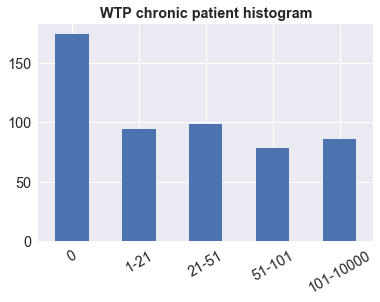

In [80]:
hist_equal_bins(q4, [0, 1, 21, 51, 101, 10000])
title('WTP chronic patient histogram')

In [90]:
q6 = df['Question #6 Raw Response']
q6 = q6.replace('no idea', -1).astype('float').replace(-1, nan)
q6.value_counts().sort_index()

0.0       238
1.0         5
5.0        21
6.0         2
7.0         2
10.0       31
15.0        6
20.0       24
25.0       24
30.0       10
35.0        2
45.0        2
49.0        1
50.0       46
55.0        1
60.0        2
75.0        4
80.0        2
100.0      30
150.0       6
200.0      26
250.0       1
300.0       6
400.0       3
500.0       4
2000.0      2
5000.0      2
Name: Question #6 Raw Response, dtype: int64

In [91]:
a = pd.qcut(q6[q6 > 0] + random.normal(size=len(q6[q6 > 0])), [0, .25, .5, .75, 1])
a.value_counts()

(-0.691, 15.895]      67
(99.927, 5000.749]    66
(48.663, 99.927]      66
(15.895, 48.663]      66
Name: Question #6 Raw Response, dtype: int64

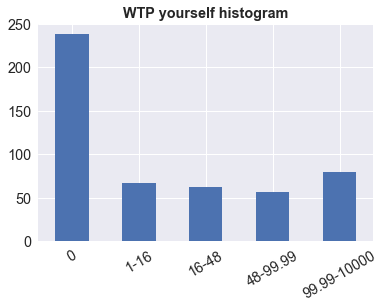

In [106]:
hist_equal_bins(q6, [0, 1, 16, 48, 99.99, 10000])
title('WTP yourself histogram')

# Average response time

In [83]:
x = df[[c for c in df.columns if 'Response Time' in c]].describe()
x

,Response Time #1 (ms),Response Time #2 (ms),Response Time #3 (ms),Response Time #4 (ms),Response Time #5 (ms),Response Time #6 (ms),Response Time #7 (ms),Response Time #8 (ms)
count,1.082000e+03,9.910000e+02,946.000000,574.000000,548.000000,521.000000,507.000000,502.000000
mean,1.801319e+04,1.586522e+04,7427.477801,12695.648084,4189.357664,7405.761996,6611.642998,3834.517928
std,8.008214e+04,1.136295e+05,20011.469499,13114.261754,9726.926921,6040.086005,34813.491735,13551.959533
min,1.052000e+03,5.810000e+02,1091.000000,2803.000000,1043.000000,1460.000000,746.000000,539.000000
25%,6.263250e+03,5.445500e+03,3875.000000,7096.000000,2208.000000,4129.000000,3137.000000,2187.750000
50%,9.344000e+03,1.007000e+04,5589.500000,9658.000000,2964.500000,5842.000000,4481.000000,2765.500000
75%,1.555850e+04,1.548450e+04,7671.250000,14464.250000,4096.750000,8297.000000,6120.500000,3689.000000
max,2.413559e+06,3.568939e+06,462154.000000,229313.000000,213862.000000,68215.000000,785648.000000,301739.000000


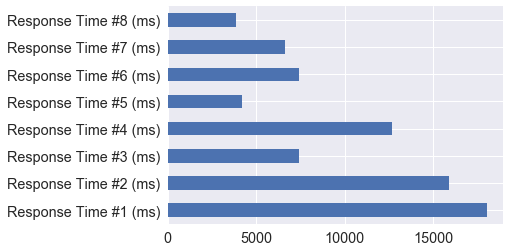

In [87]:
x.loc['mean'].plot('barh')

# Dropoff Analysis

In [109]:
df.columns

Index([u'User ID', u'Time (UTC)', u'Survey Completion', u'Publisher Category',
       u'Gender', u'Age', u'Geography', u'Weight', u'Question #1 Answer',
       u'Question #2 Answer', u'Question #3 Answer',
       u'Question #4 Raw Response', u'Question #5 Answer',
       u'Question #6 Raw Response', u'Question #7 Answer',
       u'Question #8 Answer', u'Response Time #1 (ms)',
       u'Response Time #2 (ms)', u'Response Time #3 (ms)',
       u'Response Time #4 (ms)', u'Response Time #5 (ms)',
       u'Response Time #6 (ms)', u'Response Time #7 (ms)',
       u'Response Time #8 (ms)'],
      dtype='object')

In [117]:
cols = ['Question #4 Raw Response', 'Question #5 Answer', 'Question #6 Raw Response', 'Question #7 Answer', 'Question #8 Answer']
dropoff1 = df[cols].isnull().all(axis=1)

In [120]:
np.all(dropoff1 == df['Question #4 Raw Response'].isnull())

True

In [121]:
df['is_dropoff'] = df['Question #4 Raw Response'].isnull()

In [194]:
df['geography_area'] = df.Geography.str.split('-', 2).str.get(1)
df['geography_state'] = df.Geography.str.split('-', 2).str.get(2)

In [196]:
def plot_dropoff_dist(df, col):
    x = df.groupby('is_dropoff')[col].value_counts()
    y = pd.DataFrame(index=df[col].unique())
    y['whole'] = x.loc[False]
    y['dropoff'] = x.loc[True]
    y = y.dropna()
    
    fig, axes = subplots(nrows=1, ncols=2, figsize=(14, 6))
    (100.0 * y / y.sum(axis=0)).sort_index().plot.barh(ax=axes[0])
    axes[0].set_xlabel('percent')
    axes[0].set_title('whole/dropoff {}'.format(col))
    (100.0 * y / y.sum(axis=0)).sort_index().T.plot.barh(ax=axes[1], stacked=True)
    axes[1].set_xlabel('percent')
    axes[1].set_title('whole/dropoff {}'.format(col))

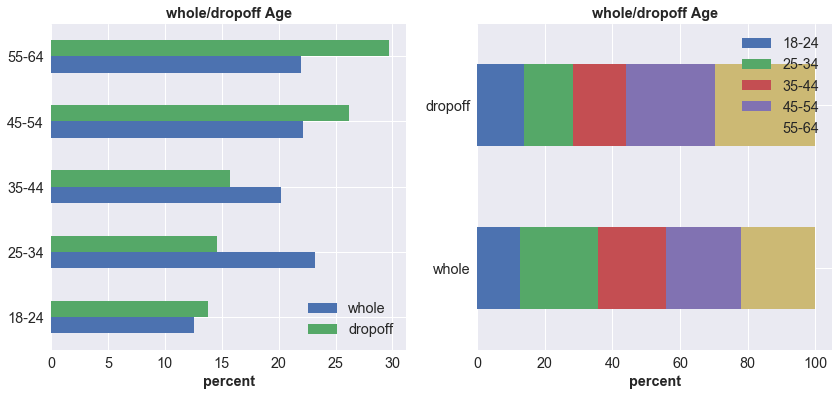

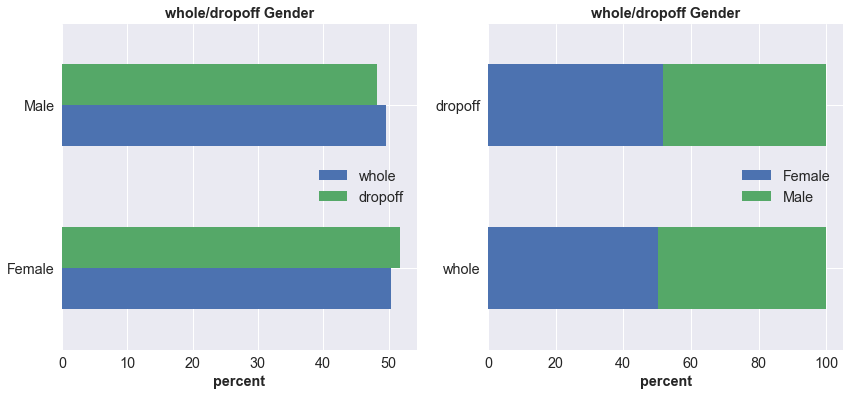

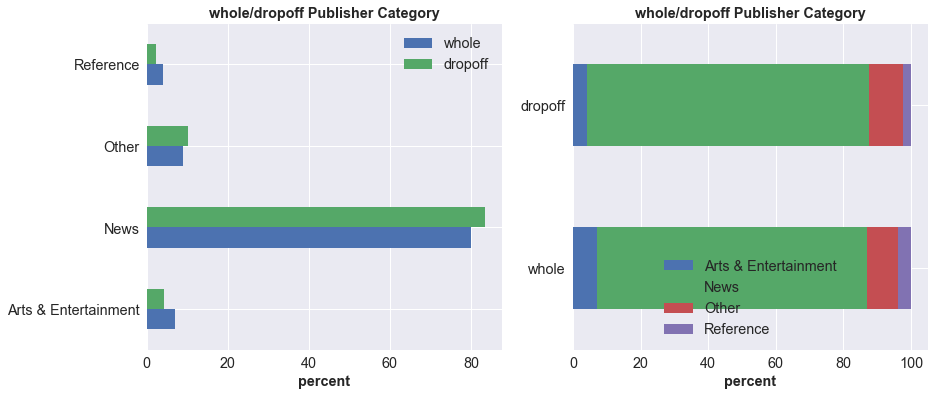

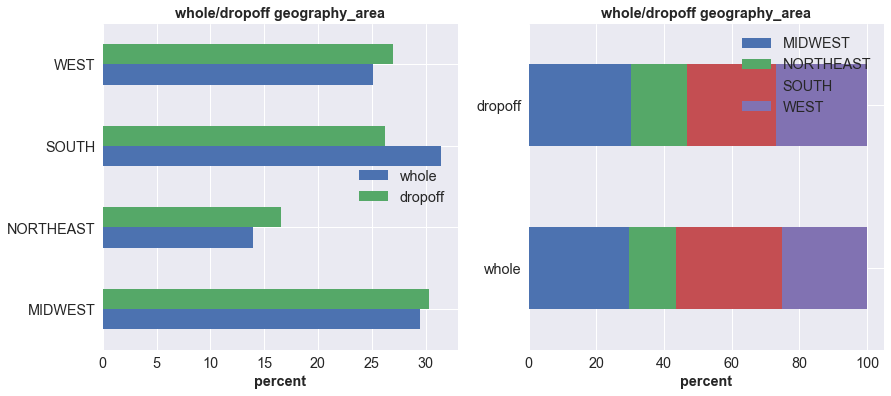

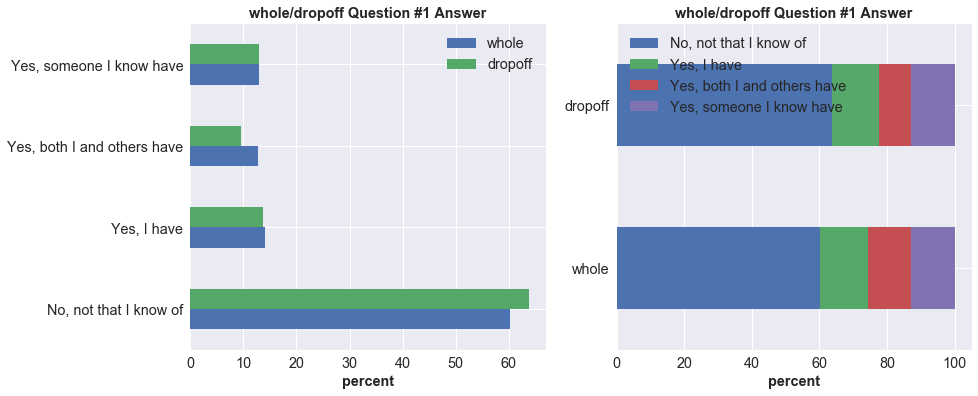

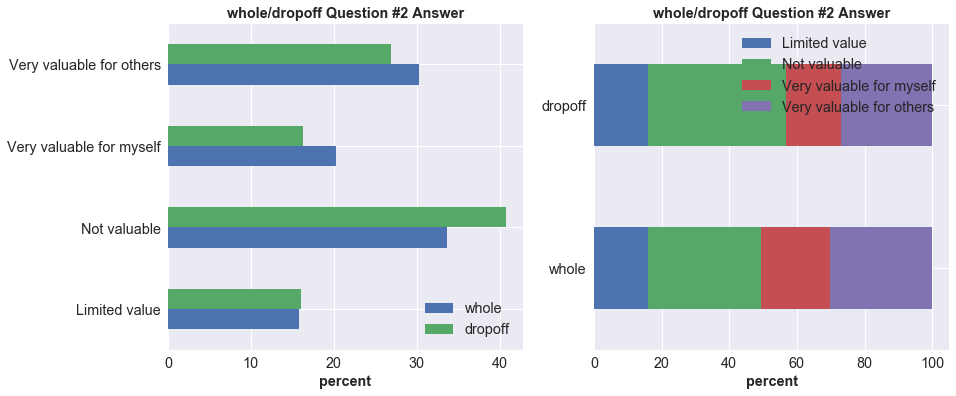

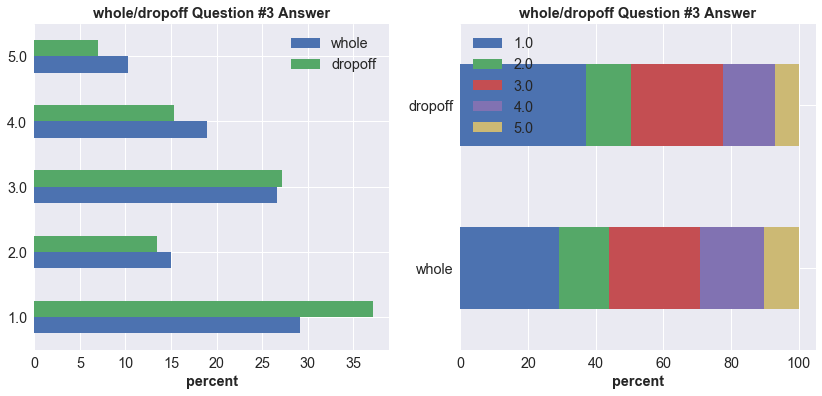

In [233]:
for cat in ['Age', 'Gender', 'Publisher Category', 'geography_area', 
            'Question #1 Answer', 'Question #2 Answer', 'Question #3 Answer']:
    figure()
    plot_dropoff_dist(df, cat)

In [230]:
def response_time_1_3_dropoff(df):
    c = 'Response_time_1_3'
    df[c] = df[['Response Time #{} (ms)'.format(i) for i in range(1, 4)]].mean(axis=1)
    df.loc[df[c] > 30000, c] = nan
    df.loc[df.is_dropoff, c].plot.kde(alpha=0.5, label='drop', color='g')
    df.loc[~df.is_dropoff, c].plot.kde(alpha=0.5, label='whole', color='b')
    xlim(0, 30000)
    legend(loc='best')

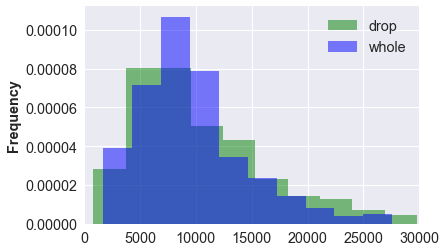

In [229]:
response_time_1_3_dropoff(df)

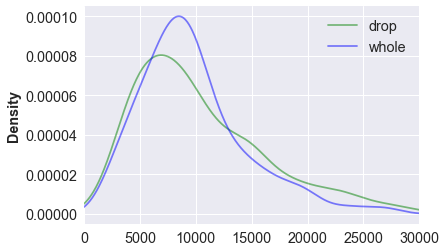

In [231]:
response_time_1_3_dropoff(df)

### sub categories

In [266]:
a2 = df['Question #2 Answer']
a3 = df['Question #3 Answer']
a4 = df['Question #4 Raw Response']
a4 = a4.replace('no idea', -1).astype('float').replace(-1, nan)
a5 = df['Question #5 Answer']
a6 = df['Question #6 Raw Response']

##### congruency

In [274]:
x = (a2 == 'Not valuable') & (a3 >= 4)
x = x | ((a2.str.startswith('Very valuable')) & (a3 == 1))
x = x | ((a3 >= 4) & (a4 == 0))
x = x | ((a5 >= 4) & (a6 == 0))
df['cat_incongruent'] = x

In [245]:
df['cat_dropoff'] = df['is_dropoff']

##### chronic

In [279]:
x = a2 == 'Very valuable for myself'
x = x | (a6 >= a4)
# x = x | (df['Question #5 Raw Response'] >= df['Question #4 Raw Response'])
df['cat_chronic'] = x

##### chronic extra

In [280]:
x = df['cat_chronic']
x = x & (df['Question #8 Answer'] == 'Yes')
df['cat_chronic_extra'] = x

##### Hate

In [281]:
thr6 = percentile(a6[~a6.isnull()], 95)
thr4 = percentile(a4[~a4.isnull()], 95)
print thr4, thr6

455.0 200.0


In [282]:
x = ((a3 == 1) & (a4 == 0) & (a5 == 1) & (a6 == 0))
x = x | ((a3 == 1) & (a4 == 0) & (a5 == 1) & (a6 >= thr6))
x = x | ((a3 == 1) & (a4 >= thr4) & (a5 == 1) & (a6 == 0))
df['cat_hate'] = x

##### non_understand

In [283]:
x = (a2.str.startswith('Very valuable')) & (a3 >= 4) & (a4 >= thr4)
x = x | ((a2.str.startswith('Very valuable')) & (a5 >= 4) & (a6 >= thr6))
df['cat_non_understand'] = x

In [284]:
x = (~df.cat_incongruent) & (~df.cat_non_understand) & \
    (~df.cat_hate) & (~df.cat_dropoff)
df['cat_ideal'] = x

In [285]:
df['cat_ideal_chronic'] = df.cat_ideal & df.cat_chronic

##### done

In [286]:
cat_cols = [c for c in df.columns if c.startswith('cat_')]

In [290]:
for cat in cat_cols:
    print '{} people in {}'.format(sum(df[cat]), cat)

508 people in cat_dropoff
421 people in cat_chronic
109 people in cat_chronic_extra
97 people in cat_hate
18 people in cat_non_understand
96 people in cat_incongruent
413 people in cat_ideal
217 people in cat_ideal_chronic


In [307]:
def plot_dists_together(df, target):
    cat_cols = [c for c in df.columns if c.startswith('cat_')]
    y = pd.DataFrame(index=df[target].unique())
    for cat in cat_cols:
        x = df.groupby(cat)[target].value_counts()
        y[cat] = x.loc[True]
    y['everybody'] = df[target].value_counts()
    
    fig, axes = subplots(nrows=2, ncols=1, figsize=(14, 14))
    (100.0 * y / y.sum(axis=0)).sort_index().plot.barh(ax=axes[0])
    axes[0].set_xlabel('percent')
    axes[0].set_title('{}'.format(target))
    (100.0 * y / y.sum(axis=0)).sort_index().T.plot.barh(ax=axes[1], stacked=True)
    axes[1].set_xlabel('percent')
    axes[1].set_title('{}'.format(target))

    fn = '/Users/roee/work/wtp_survey/all_groups_{}.png'.format(target)
    fig.savefig(fn)

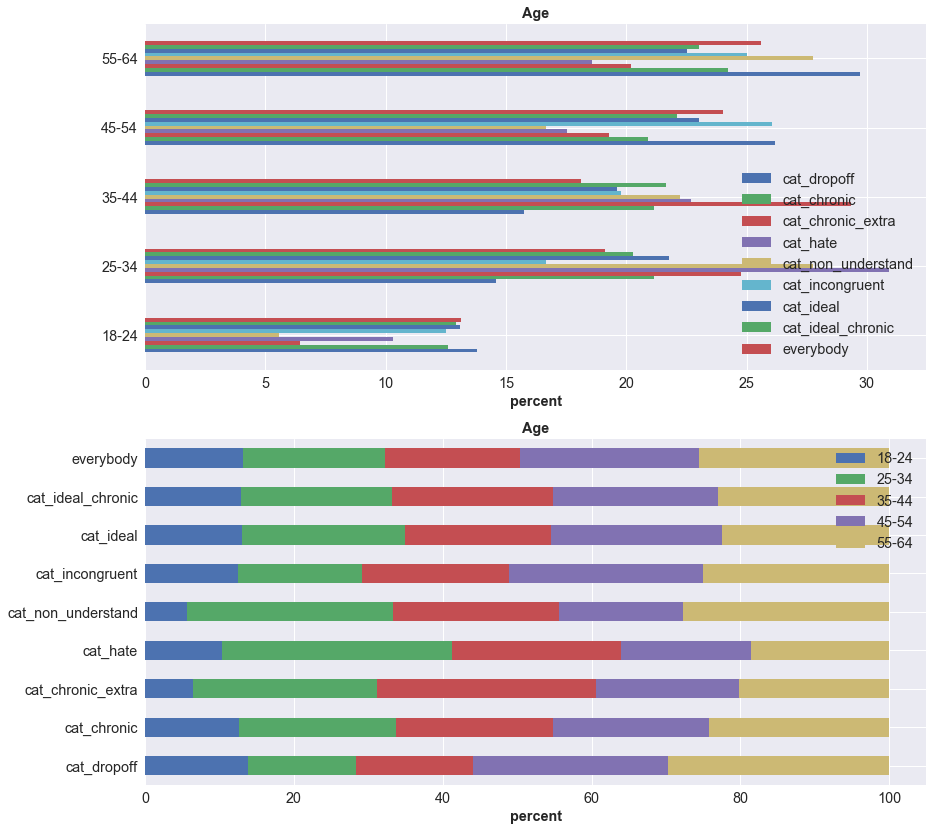

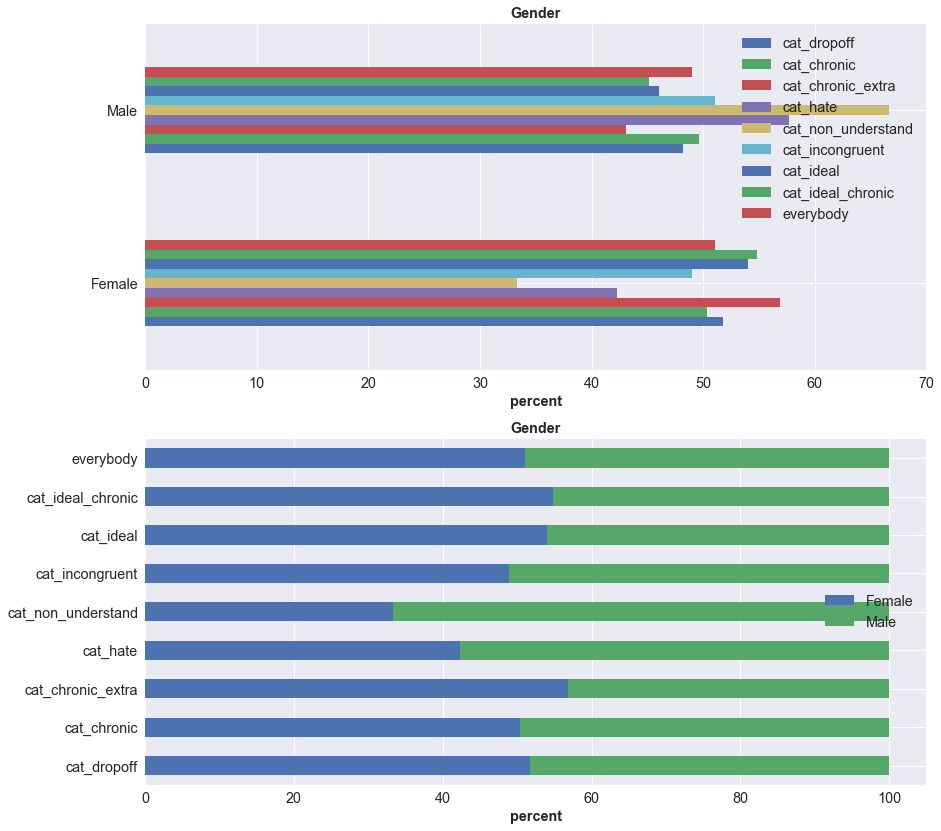

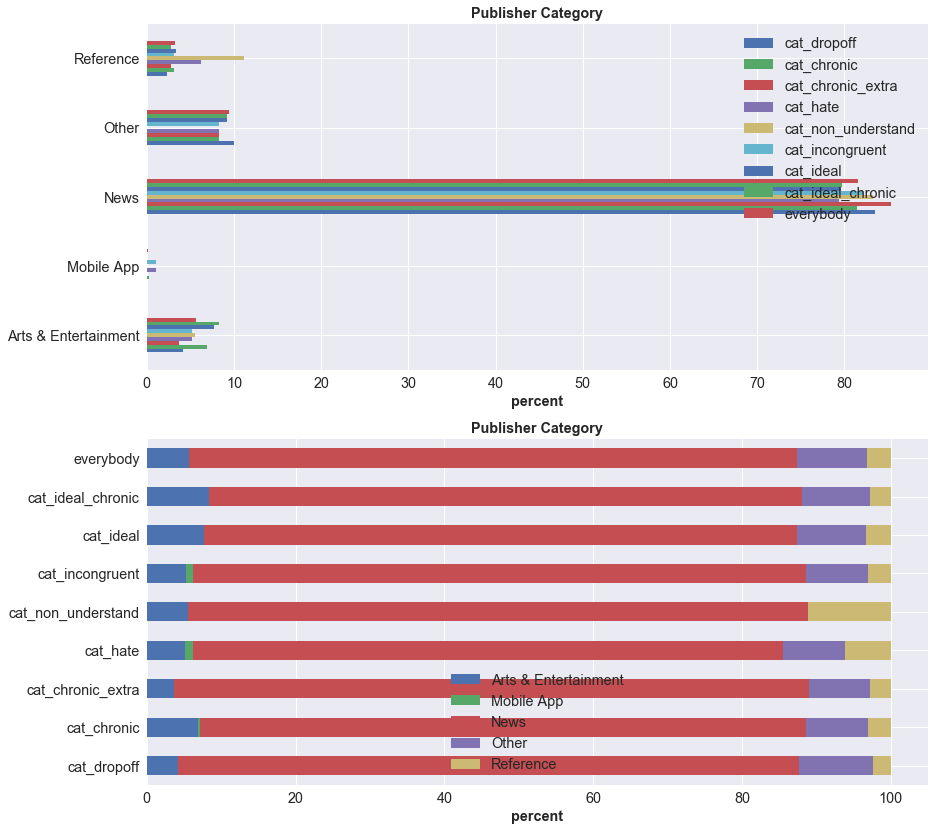

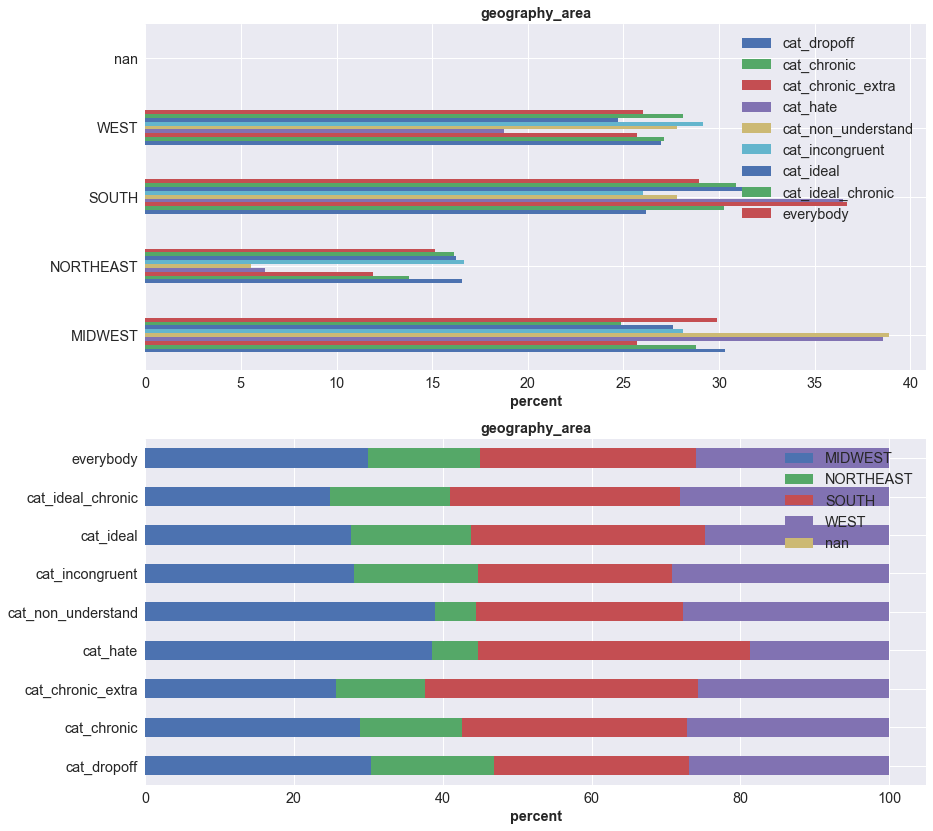

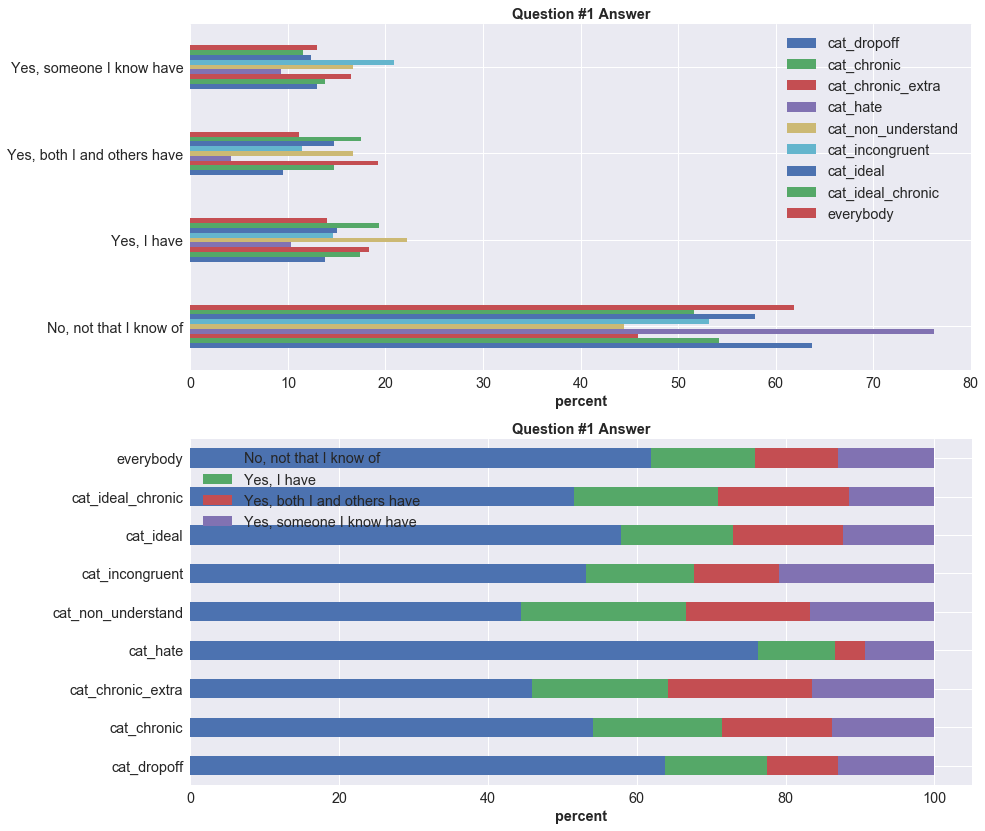

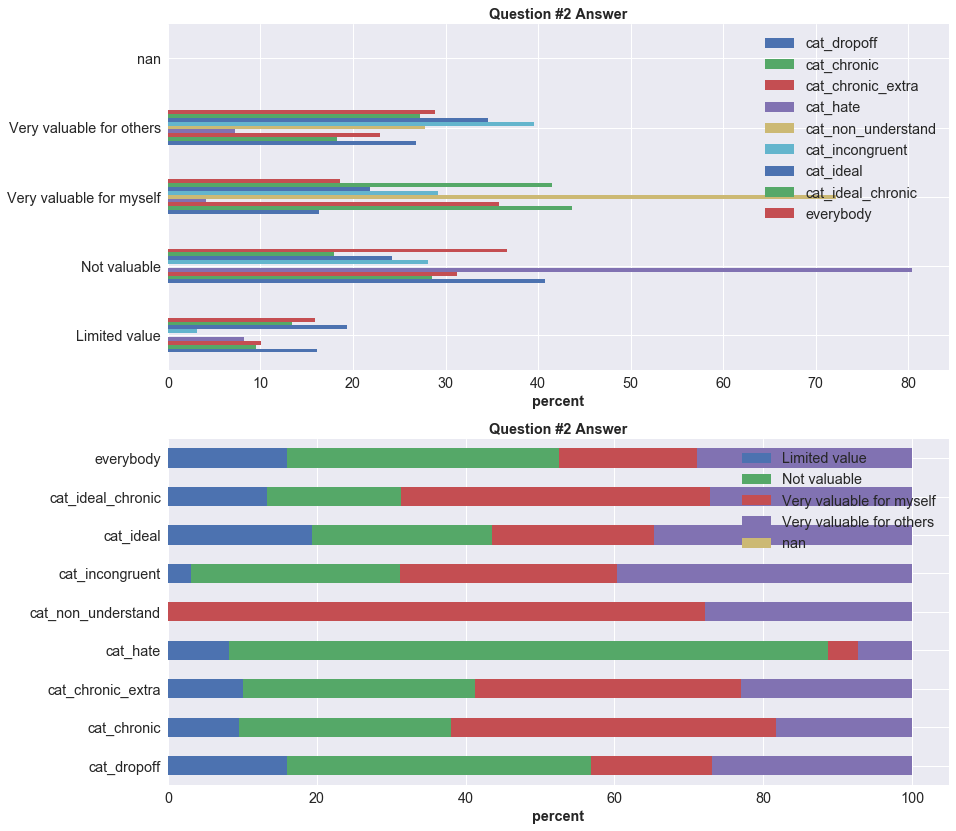

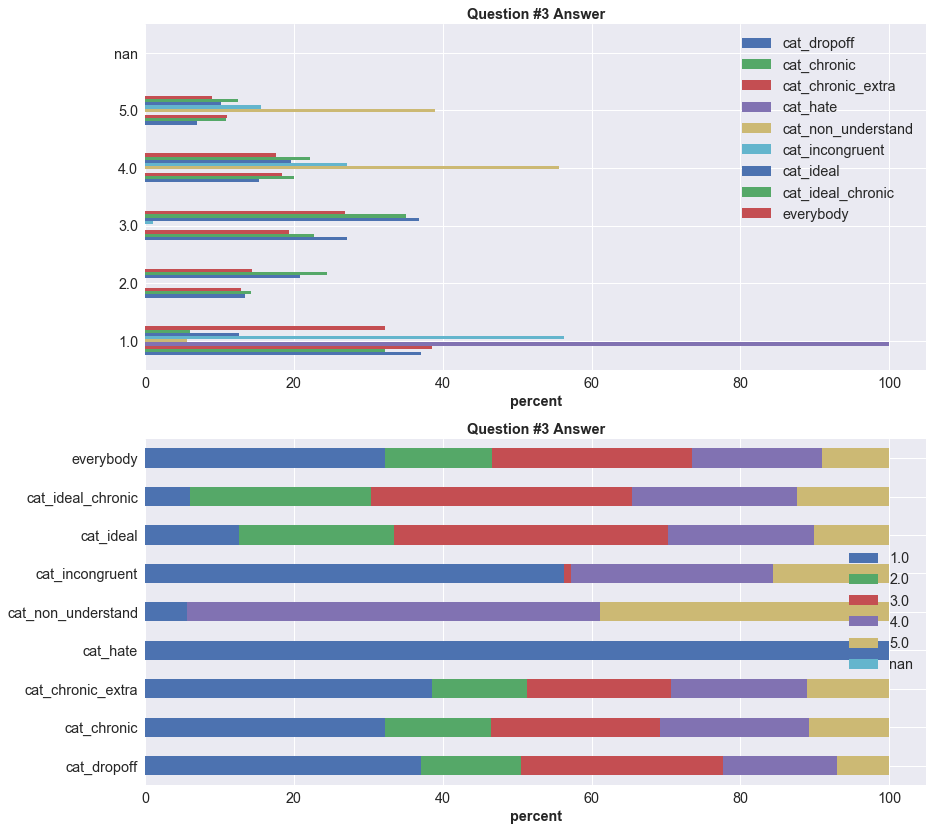

In [308]:
for cat in ['Age', 'Gender', 'Publisher Category', 'geography_area', 
            'Question #1 Answer', 'Question #2 Answer', 'Question #3 Answer']:
    figure()
    plot_dists_together(df, cat)

In [311]:
def plot_dists_each_group(df, target):
    cat_cols = [c for c in df.columns if c.startswith('cat_')]
    for cat in cat_cols:
        y = pd.DataFrame(index=df[target].unique())        
        x = df.groupby(cat)[target].value_counts()
        y[cat.replace('cat_', '')] = x.loc[True]
        y['not ' + cat.replace('cat_', '')] = x.loc[False]
    
        fig, axes = subplots(nrows=1, ncols=2, figsize=(14, 6))
        (100.0 * y / y.sum(axis=0)).sort_index().plot.barh(ax=axes[0])
        axes[0].set_xlabel('percent')
        axes[0].set_title('{} - {}'.format(cat, target))
        (100.0 * y / y.sum(axis=0)).sort_index().T.plot.barh(ax=axes[1], stacked=True)
        axes[1].set_xlabel('percent')
        axes[1].set_title('{} - {}'.format(cat, target))
        
        fn = '/Users/roee/work/wtp_survey/{}_{}.png'.format(cat, target)
        fig.savefig(fn)
        close()

In [312]:
for cat in ['Age', 'Gender', 'Publisher Category', 'geography_area', 
            'Question #1 Answer', 'Question #2 Answer', 'Question #3 Answer']:
    plot_dists_each_group(df, cat)

### overlap between groups

In [314]:
from itertools import combinations

In [334]:
s = ''
for cat1, cat2 in combinations(cat_cols, 2):
    s += (df.groupby((cat1, cat2)).size() * 100.0 / len(df)).to_string()
    s += '\n\n'
with open('/Users/roee/work/wtp_survey/group_pairs_percent.txt', 'w') as f:
    f.write(s)

### questions

In [364]:
for c in ['Question #4 Raw Response', 'Question #6 Raw Response']:
    df[c] = df[c].replace('no idea', -1).astype('float').replace(-1, nan)

In [386]:
df2 = df.copy()

In [393]:
a4 = df2['Question #4 Raw Response']
df2.loc[a4 > percentile(a4[~a4.isnull()], 95), 'Question #4 Raw Response'] = nan

a6 = df2['Question #6 Raw Response']
df2.loc[a6 > percentile(a6[~a6.isnull()], 95), 'Question #6 Raw Response'] = nan

In [521]:
bins4 = [0, 1, 21, 51, 101, 401]
bins6 = [0, 1, 16, 48, 99, 201]
idx4 = ['0', '1-21', '21-51' ,'51-101', '101-401']
idx6 = ['0', '1-16', '16-48', '48-99', '99-201']

for qr, bins, idx in zip([4, 6], [bins4, bins6], [idx4, idx6]):
    cat_cols = [c for c in df.columns if c.startswith('cat_')]
    for cat in cat_cols:
        fig, axes = subplots(nrows=3, ncols=1, figsize=(12, 14))
        for i, qb in enumerate([1, 3, 5]):
            y = pd.DataFrame(index=idx)
            a = df2['Question #{} Answer'.format(qb)]
            for v in a.unique():
                if isinstance(v, float) and isnan(v):
                    continue
                s = hist_equal_bins(df2[(a == v) & (df2[cat])]['Question #{} Raw Response'.format(qr)], 
                                    bins=bins, to_plot=False)
                y[v] = s
            y = y / y.sum(axis=0) * 100
            y = y.T.sort_index()

            y.plot.barh(stacked=True, ax=axes[i], rot=0);
            axes[i].set_xlabel('percent');
            axes[i].set_ylabel('Q{} Answer'.format(qb));
            axes[i].set_title('{} - Histogram of Q4 by answers to Q{}'.format(cat, qb));
        tight_layout();
        fn = '/Users/roee/work/wtp_survey/breakdown_{}_q{}_by_q1_3_5.png'.format(cat, qr)
        fig.savefig(fn)
        close()

# Questions 4 and 6

In [504]:
repl = lambda x: '{:03d}-{:03d}'.format(int(x.group(1))+1, int(x.group(2)))
df2['q4_bin'] = pd.cut(df2['Question #4 Raw Response'], [-1] + bins4).astype('str').replace('(-1, 0]', '0')
df2['q4_bin'] = df2['q4_bin'].str.replace(r'\((\d+), (\d+)\]', repl)
df2['q6_bin'] = pd.cut(df2['Question #6 Raw Response'], [-1] + bins6).astype('str').replace('(-1, 0]', '0')
df2['q6_bin'] = df2['q6_bin'].str.replace(r'\((\d+), (\d+)\]', repl)

In [524]:
cat_cols = [c for c in df.columns if c.startswith('cat_')]
for cat in cat_cols:
    fig, axes = subplots(nrows=2, ncols=1, figsize=(12, 14))
    for i, (qa, qb) in enumerate(zip([4, 6], [6, 4])):
        y = pd.DataFrame(index=df2['q{}_bin'.format(qa)].unique())
        a = df2['q{}_bin'.format(qb)]
        for v in a.unique():
            y[v] = df2.loc[(a == v) & (df2[cat]), 'q{}_bin'.format(qa)].value_counts()
        del y['nan']
        y = y.T
        del y['nan']
        y = y.T
        y = y.sort_index().reindex_axis(sorted(y.columns), axis=1)
        y = y / y.sum(axis=0) * 100
        y = y.T.sort_index()

        y.plot.barh(stacked=True, ax=axes[i], rot=0);
        axes[i].set_xlabel('percent');
        axes[i].set_ylabel('Q{} Answer'.format(qb));
        axes[i].set_title('{} ({} users) - Histogram of Q{} by answers to Q{}'.format(cat, sum(df2[cat]), qa, qb));
    tight_layout();
    fn = '/Users/roee/work/wtp_survey/breakdown_{}_q4_by_q6_and_vice_versa.png'.format(cat)
    fig.savefig(fn)
    close()

In [512]:
df.to_csv('/Users/roee/work/wtp_survey/survey_results.csv')